In [3]:
import os
import cv2
import imghdr
import warnings
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
warnings.filterwarnings("ignore")

<b> Data Cleaning <b>

In [4]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            

# Model Training

In [5]:
datagen_kwargs = dict(rescale=1./255, validation_split=0.20)
train_datagen = ImageDataGenerator(**datagen_kwargs)
valid_datagen = ImageDataGenerator(**datagen_kwargs)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    data_dir,
    subset='training',
    shuffle=True,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    data_dir,
    subset='validation',
    shuffle=True,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

Found 147 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

In [7]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
assert valid_generator is not None, "Validation generator is None"
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    verbose=1,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
5/5 [==============================] - 17s 3s/step - loss: 2.3903 - accuracy: 0.5102 - val_loss: 0.6777 - val_accuracy: 0.5556
Epoch 2/10
5/5 [==============================] - 12s 2s/step - loss: 0.6522 - accuracy: 0.6054 - val_loss: 0.6525 - val_accuracy: 0.5278
Epoch 3/10
5/5 [==============================] - 12s 2s/step - loss: 0.6597 - accuracy: 0.6599 - val_loss: 0.6858 - val_accuracy: 0.6389
Epoch 4/10
5/5 [==============================] - 12s 2s/step - loss: 0.6280 - accuracy: 0.6463 - val_loss: 0.6270 - val_accuracy: 0.6944
Epoch 5/10
5/5 [==============================] - 13s 3s/step - loss: 0.5195 - accuracy: 0.7687 - val_loss: 0.7189 - val_accuracy: 0.4444
Epoch 6/10
5/5 [==============================] - 13s 3s/step - loss: 0.4252 - accuracy: 0.7755 - val_loss: 0.6152 - val_accuracy: 0.5556
Epoch 7/10
5/5 [==============================] - 12s 2s/step - loss: 0.4256 - accuracy: 0.7823 - val_loss: 0.6024 - val_accuracy: 0.7500
Epoch 8/10
5/5 [==================

<b> Model Testing <b>

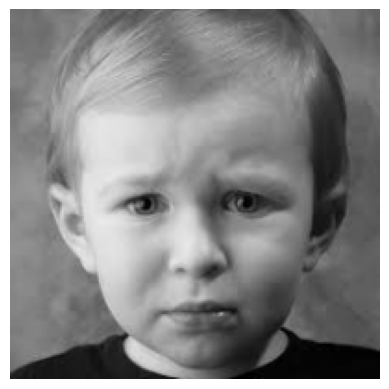

In [8]:
# Displaying the Testing Image showing sad expression
img = cv2.imread('images (1).jpeg')
resize = tf.image.resize(img, (200,200))
plt.imshow(resize.numpy().astype(int))
plt.axis("off")
plt.show()

# Model Prediction

In [9]:
# Predicting the expression of target result
pred = model.predict(np.expand_dims(resize/255, 0))
if pred > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 [==============================] - 0s 409ms/step
Predicted class is Sad
